In [4]:
from GWAPWAi import *

In [43]:
observ_dict = reorganize_instructions(parse_file("test_input.in"))
flat_params, unpack_fn, static_params = pack_parameters(observ_dict, wave="P")
static_params["channel_names"] = observ_dict["channels"]["names"]  # add channel labels

In [50]:
s_vals = torch.linspace(static_params["smin"]**2, static_params["smax"]**2, steps=500, dtype=torch.cdouble)
II = precompute_II(s_vals, static_params, integrate_rhoN_scp, rhoN_dispatcher, momentum, sheet = 0, epsilon = 0.03, num_integ=100000)

In [51]:
# Compute and plot intensity
intensity = compute_intensity(
    s=s_vals,
    flat_params=flat_params,
    unpack_fn=unpack_fn,
    static_params=static_params,
    II=II,
    numerator_func=numerator,
    omega_pole_func=omega_pole,
    construct_phsp_func=construct_phsp,
    K_nominal_func=K_nominal,
    momentum_func=momentum
)


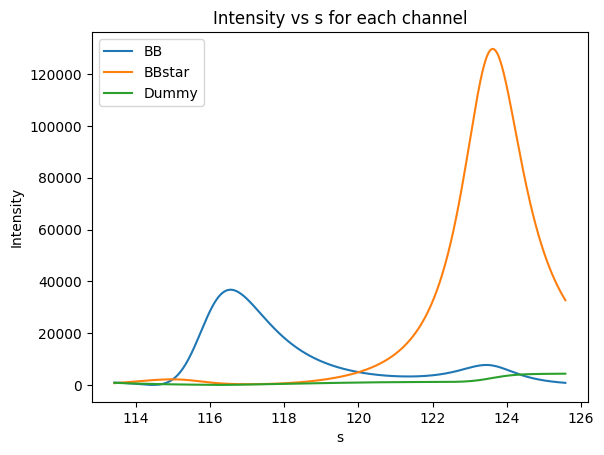

In [52]:
s_np = (s_vals).detach().cpu().numpy().real
intensity_np = intensity.detach().cpu().numpy()
ch_labels = ["BB", "BBstar", "Dummy"]

for i, label in enumerate(ch_labels):
    plt.plot(s_np, intensity_np[:, i], label=label)

plt.xlabel("s")
plt.ylabel("Intensity")
plt.title("Intensity vs s for each channel")
plt.legend()
plt.show()



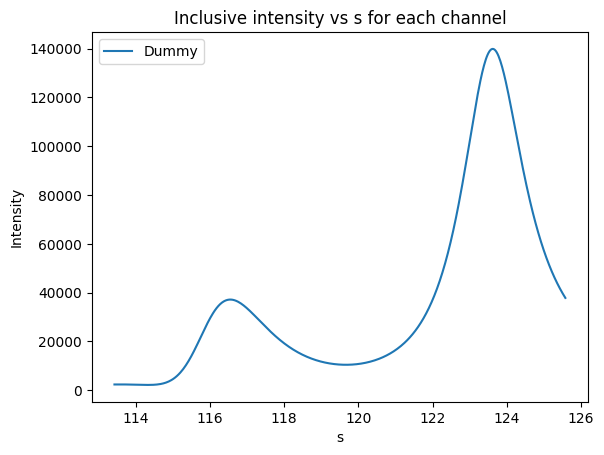

In [53]:
plt.plot(s_np, intensity_np.sum(axis = 1), label=label)

plt.xlabel("s")
plt.ylabel("Intensity")
plt.title("Inclusive intensity vs s for each channel")
plt.legend()
plt.show()